In [2]:
## import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline

In /Users/dornamu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/dornamu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/dornamu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/dornamu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/dornamu/opt/anaconda3/lib/

In [3]:
## import data
# 2014
df_2014 = pd.read_csv('./stack_overflow_collection/2014 Stack Overflow Survey Responses.csv')
df_2014.name = '2014'
# 2015
df_2015 = pd.read_csv('./stack_overflow_collection/2014 Stack Overflow Survey Responses.csv')
df_2015.name = '2015'
# 2016
df_2016 = pd.read_csv('./stack_overflow_collection/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2016.name = '2016'
# 2017
df_2017 = pd.read_csv('./stack_overflow_collection/stack-overflow-developer-survey-2017/survey_results_public.csv')
df_2017.name = '2017'
# 2018
df_2018 = pd.read_csv('./stack_overflow_collection/stack-overflow-developer-survey-2018/survey_results_public.csv')
df_2018.name = '2018'
# 2019
df_2019 = pd.read_csv('./stack_overflow_collection/stack-overflow-developer-survey-2019/survey_results_public.csv')
df_2019.name = '2019'
# 2020
df_2020 = pd.read_csv('./stack_overflow_collection/stack-overflow-developer-survey-2020/survey_results_public.csv')
df_2020.name = '2020'
# 2021
df_2021 = pd.read_csv('./stack_overflow_collection/stack-overflow-developer-survey-2021/survey_results_public.csv')
df_2021.name = '2021'

/Users/dornamu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Prep

For this step, I'm going to change the values related to gender for consistency.

There may of course exist missing values for the gender, salary, and job satisfaction column but I'm not going to fill them in or remove them for the dataframe. The rows with the missing values will instead not be excluded in the code/visualizations pertaining to that column.

In [4]:
# change column name for gender for consistency
df_2014.rename(columns={'What is your gender?': 'Gender'}, inplace = True)
df_2015.rename(columns={'What is your gender?': 'Gender'}, inplace = True)
df_2016.rename(columns={'gender':'Gender'}, inplace = True)

In [5]:
# create empty df
df_gender = pd.DataFrame(columns=['Year','% Female', '% Male'])

In [6]:
# define function 'Man' to 'Male', and 'Woman' to 'Female' (again, for consistency)
def apply_fix(word):
    '''Returns "Male" for "Man" and "Female" for "Woman", other gender identies are returned
    without change'''
    if word == 'Man':
        return 'Male'
    elif word == 'Woman':
        return 'Female'
    else:
        return word

## 1. How has the gender representation in the stackoverflow survey response changed over the years?

In [7]:
# apply function
df_list = [df_2017,df_2018,df_2019,df_2020,df_2021]
for df in df_list:
    df['Gender'] = df['Gender'].apply(apply_fix)

In [8]:
# populate empty df_gender 
df_list = [df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021]
for df in df_list:
    year = df.name
    f_perc = (df.groupby('Gender').size()['Female']/(df.groupby('Gender').size()['Female'] + df.groupby('Gender').size()['Male'])) * 100
    m_perc = (df.groupby('Gender').size()['Male']/(df.groupby('Gender').size()['Female'] + df.groupby('Gender').size()['Male'])) * 100
    df_gender = df_gender.append({'Year':year, '% Female': f_perc, '% Male': m_perc}, ignore_index=True)

df_gender   

,Year,% Female,% Male
0,2014,4.878049,95.121951
1,2015,4.878049,95.121951
2,2016,5.865543,94.134457
3,2017,7.604785,92.395215
4,2018,6.340280,93.659720
5,2019,7.528809,92.471191
6,2020,7.710051,92.289949
7,2021,5.219352,94.780648


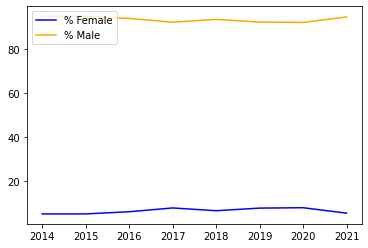

In [9]:
# Plot % Female and % Male respondents over the years

fig, ax = plt.subplots()

x = df_gender['Year']
y_f = df_gender['% Female']
y_m = df_gender['% Male']
ax.plot(x, y_f, color = 'blue', label = '% Female')
ax.plot(x, y_m, color = 'orange', label = '% Male')
ax.legend(loc = 'upper left')
plt.savefig('gender_response.png')
plt.show()

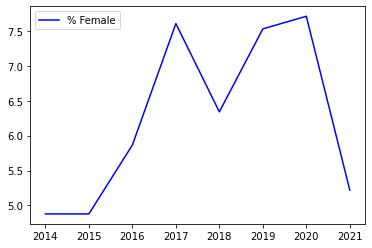

In [10]:
# Plot % Female respondents only to see how it has changed over the years
fig, ax = plt.subplots()

x = df_gender['Year']
y_f = df_gender['% Female']
ax.plot(x, y_f, color = 'blue', label = '% Female')
ax.legend(loc = 'upper left')
plt.savefig('female_response.png')
plt.show()

In [11]:
## quick question, did the number of respondents drastically decrease in 2021

print(len(df_2014.Gender))
print(len(df_2021.Gender))

7644
83439


In [12]:
print(len(df_2020.Gender))

64461


In [13]:
resp_count = []
for df in df_list:
    resp_count.append(len(df.Gender))
resp_count

[7644, 7644, 56030, 51392, 98855, 88883, 64461, 83439]

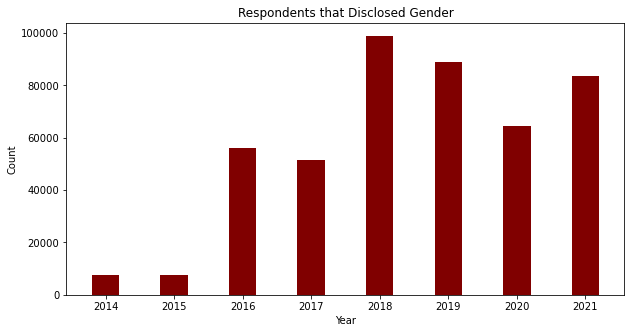

In [14]:
fig = plt.figure(figsize = (10, 5))
x = df_gender['Year']
y = resp_count
# creating the bar plot
plt.bar(x, y, color ='maroon',width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Respondents that Disclosed Gender")
plt.savefig('response_count.png')
plt.show()

## 2. What was the relationship between salary and gender in 2016?

In [15]:
# Get an overview of the data available for each region
df_2016['so_region'].value_counts()

Western Europe     19157
North America      15563
Eastern Europe      7396
South Asia          4894
South America       1780
Middle East         1653
Oceania             1481
Southeast Asia       939
Africa               874
East Asia            819
Central America      537
Caribbean            151
Central Asia         145
Antarctica             1
Name: so_region, dtype: int64

Let's control for region - let's focus on the two regions with the most respondents.

In [16]:
# Western Europe
df_we = df_2016[df_2016['so_region']=='Western Europe']
# North America
df_na = df_2016[df_2016['so_region']=='North America']

In [17]:
# Create feature to flag whether or not the respond is a female
df_we['Female'] = df_we['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df_na['Female'] = df_na['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

/var/folders/15/61ywfr0d2qb148pk2mp6c4840000gn/T/ipykernel_10377/1886364609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_we['Female'] = df_we['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
/var/folders/15/61ywfr0d2qb148pk2mp6c4840000gn/T/ipykernel_10377/1886364609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['Female'] = df_na['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [18]:
df_we

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,Gender,self_identification,occupation,...,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow,Female
26,348,Facebook,Andorra,Southern Europe,Western Europe,40-49,44.5,Male,Sr. Developer,Desktop developer,...,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Non-technical management; Changing requirement...,To get help for my job; To give help to others...,0
27,5609,Facebook,Andorra,Southern Europe,Western Europe,NaN,NaN,NaN,NaN,Mobile developer - Windows Phone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28,34171,Facebook,Andorra,Southern Europe,Western Europe,20-24,22.0,Female,Hacker,Data scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
237,312,Facebook,Austria,Western Europe,Western Europe,35-39,37.0,Male,Developer; Engineer; Sr. Developer,Back-end web developer,...,This is somewhat important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,Interacting with non-technical people; Unspeci...,To get help for my job; To receive help on my ...,0
238,1286,Facebook,Austria,Western Europe,Western Europe,35-39,37.0,Male,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55157,52757,Twitter,United Kingdom,Northern Europe,Western Europe,25-29,27.0,Male,Developer; Programmer,other,...,This is very important,This is very important,This is somewhat important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,Fragile code base; Unrealistic expectations; P...,To get help for my job; To give help to others...,0
55158,52761,Twitter,United Kingdom,Northern Europe,Western Europe,30-34,32.0,Male,Developer; Programmer; Sr. Developer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
55159,52772,Twitter,United Kingdom,Northern Europe,Western Europe,30-34,32.0,Male,Developer; Engineer; Programmer; Sr. Developer,Mobile developer - iOS,...,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is very important,This is very important,Poor team dynamics; Inefficient development pr...,To get help for my job,0
55160,52783,Twitter,United Kingdom,Northern Europe,Western Europe,35-39,37.0,Male,Developer; Programmer; Sr. Developer; Full-sta...,Front-end web developer,...,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Changing requirements,To get help for my job; To give help to others...,0


In [19]:
# seperate by gender
df_we_f = df_we[df_we['Female']==1]
df_we_m = df_we[df_we['Female']==0]
df_na_f = df_na[df_na['Female']==1]
df_na_m = df_na[df_na['Female']==0]

**Western Europe**

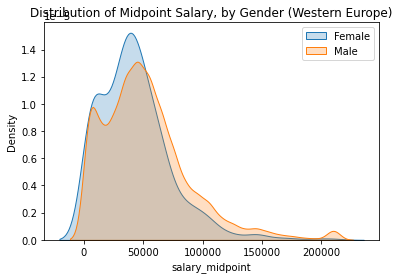

In [20]:
# KDE plots for each gender on the same chart
sns.kdeplot(data=df_we_f['salary_midpoint'], label="Female", shade=True)
sns.kdeplot(data=df_we_m['salary_midpoint'], label="Male", shade=True)

# Add title
plt.title("Distribution of Midpoint Salary, by Gender (Western Europe)")
plt.savefig('we_salary.png')
plt.legend()

**North America**

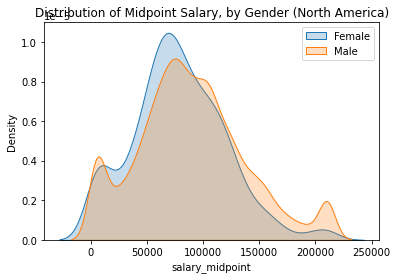

In [21]:
# KDE plots for each gender on the same chart
sns.kdeplot(data=df_na_f['salary_midpoint'], label="Female", shade=True)
sns.kdeplot(data=df_na_m['salary_midpoint'], label="Male", shade=True)

# Add title
plt.title("Distribution of Midpoint Salary, by Gender (North America)")
plt.savefig('na_salary.png')
plt.legend()

## 3. What is the relationship between gender and job satisfaction?

In [22]:
## code modified from the course: https://github.com/udacity/DSND_Term2/blob/master/lessons/CRISP_DM/How%20To%20Break%20Into%20the%20Field%20-%20Solution%20.ipynb
def clean_and_plot(df, title='Job Satisfaction Level', plot=True):
    '''
    INPUT 
        df - a dataframe holding the job_satisfaction column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        props_sat_df_df - a dataframe with the percentage of individuals who selection each job satisfaction level.
        Displays a plot of pretty things related to the job_satisfaction column.
    '''
    job_sat_df = df['job_satisfaction'].value_counts().reset_index()
    job_sat_df.rename(columns={'index': 'Job Satisfaction Level', 'job_satisfaction': 'count'}, inplace=True)
    #job_sat_df = t.total_count(study, 'method', 'count', possible_vals)

    job_sat_df.set_index('Job Satisfaction Level', inplace=True)
    if plot:
        (job_sat_df/job_sat_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_sat_df = job_sat_df/job_sat_df.sum()
    return props_sat_df

In [23]:
# North America
f_perc_na = clean_and_plot(df_na_f, 'Female', plot=False)
m_perc_na = clean_and_plot(df_na_m, 'Male', plot=False)
# Western Europe
f_perc_we = clean_and_plot(df_we_f, 'Female', plot=False)
m_perc_we = clean_and_plot(df_we_m, 'Male', plot=False)

**Western Europe**

In [24]:
comp_df = pd.merge(f_perc_we, m_perc_we, left_index=True, right_index=True)
comp_df.columns = ['f_perc', 'm_perc']
comp_df['Diff_JobSatisfaction_Vals'] = comp_df['f_perc'] - comp_df['m_perc']
comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,f_perc,m_perc,Diff_JobSatisfaction_Vals
Job Satisfaction Level,,,
I'm somewhat satisfied with my job,0.393657,0.431276,-0.037619
I love my job,0.380597,0.320840,0.059757
I'm somewhat dissatisfied with my job,0.111940,0.114745,-0.002805
I'm neither satisfied nor dissatisfied,0.072761,0.099431,-0.026669
I hate my job,0.022388,0.018008,0.004380
Other (please specify),0.014925,0.009774,0.005152
I don't have a job,0.003731,0.005926,-0.002194


**North America**

In [25]:
comp_df = pd.merge(f_perc_na, m_perc_na, left_index=True, right_index=True)
comp_df.columns = ['f_perc', 'm_perc']
comp_df['Diff_JobSatisfaction_Vals'] = comp_df['f_perc'] - comp_df['m_perc']
comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,f_perc,m_perc,Diff_JobSatisfaction_Vals
Job Satisfaction Level,,,
I love my job,0.376276,0.363049,0.013227
I'm somewhat satisfied with my job,0.362245,0.401472,-0.039227
I'm somewhat dissatisfied with my job,0.140306,0.104767,0.035539
I'm neither satisfied nor dissatisfied,0.072704,0.087620,-0.014916
I hate my job,0.022959,0.026663,-0.003704
Other (please specify),0.015306,0.011491,0.003815
I don't have a job,0.010204,0.004938,0.005266


**All the regions**

In [26]:
df_2016['Female'] = df_2016['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

df_f = df_2016[df_2016['Female']==1]
df_m = df_2016[df_2016['Female']==0]

f_perc = clean_and_plot(df_f, 'Female', plot=False)
m_perc = clean_and_plot(df_m, 'Male', plot=False)

comp_df = pd.merge(f_perc, m_perc, left_index=True, right_index=True)
comp_df.columns = ['f_perc', 'm_perc']
comp_df['Diff_JobSatisfaction_Vals'] = comp_df['f_perc'] - comp_df['m_perc']
comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
dfi.export(comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d']), '2016_df.png')

[0429/105154.858339:INFO:headless_shell.cc(659)] Written to file /var/folders/15/61ywfr0d2qb148pk2mp6c4840000gn/T/tmp1s97bg7c/temp.png.


In [28]:
## In 2020 they did job satisfaction - is there a difference? 
df_2020['Female'] = df_2020['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

#rename column
df_2020.rename(columns = {'JobSat':'job_satisfaction'}, inplace = True)

df_f = df_2020[df_2020['Female']==1]
df_m = df_2020[df_2020['Female']==0]

f_perc = clean_and_plot(df_f, 'Female', plot=False)
m_perc = clean_and_plot(df_m, 'Male', plot=False)

comp_df = pd.merge(f_perc, m_perc, left_index=True, right_index=True)
comp_df.columns = ['f_perc', 'm_perc']
comp_df['Diff_JobSatisfaction_Vals'] = comp_df['f_perc'] - comp_df['m_perc']
comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
dfi.export(comp_df.style.bar(subset=['Diff_JobSatisfaction_Vals'], align='mid', color=['#d65f5f', '#5fba7d']), '2020_df.png')

[0429/105155.776047:INFO:headless_shell.cc(659)] Written to file /var/folders/15/61ywfr0d2qb148pk2mp6c4840000gn/T/tmpgo0ru5j1/temp.png.
